In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [4]:
# read data sets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
  
sample_submission = pd.read_csv("Sample_Submission.csv")

In [5]:
# look at the train set info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
# look at the test set info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
# set Loan_ID as index
train = train.set_index(["Loan_ID"], drop = True)
test = test.set_index(["Loan_ID"], drop = True)

In [8]:
# make sure that Loan_ID is index of the train set
train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
# make sure that the Loan_ID is index of the test set
test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [10]:
# look at numbers of features and records in the train and test sets
print "number of features: %d" %test.shape[1]
print "number of obs in training set: %d" %train.shape[0]
print "number of obs in test set: %d" %test.shape[0]

number of features: 11
number of obs in training set: 614
number of obs in test set: 367


In [11]:
# add a column to differenciate training and test data set after combining 
# the two data sets for data pre-processing; this way you don't need to pre-process
# the train and test data sets seperately
train['Type'] = 'Train'
test['Type'] = 'Test'

full_data = pd.concat([train, test], axis = 0)

In [12]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
Type                 981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [13]:
# look at what is format is required for the final submission
sample_submission

,Loan_ID,Loan_Status


In [14]:
# get list of target, numerical features and categorical features
target = ["Loan_Status"]
print "target variable:", target
print "\n"

numeric_f = full_data.dtypes[full_data.dtypes != "object"].index
print "numeric features:", list(numeric_f)
print "\n"

factor_f = full_data.dtypes[full_data.dtypes =='object'].index
factor_f = factor_f.drop(['Loan_Status', 'Type'])
print "categorical features: ", list(factor_f)

target variable: ['Loan_Status']


numeric features: ['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount', 'Loan_Amount_Term']


categorical features:  ['Dependents', 'Education', 'Gender', 'Married', 'Property_Area', 'Self_Employed']


In [15]:
full_data.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
Credit_History        True
Dependents            True
Education            False
Gender                True
LoanAmount            True
Loan_Amount_Term      True
Loan_Status           True
Married               True
Property_Area        False
Self_Employed         True
Type                 False
dtype: bool

In [16]:
# define a funciton to count number of missing data of each feature
def missing_data_count(df):
    missing_data = {}
    for feature in list(df):
        missing_data.update({feature:len(df[feature]) - df[feature].count()})
    missing_data_df = pd.DataFrame(data = missing_data.values(), columns = ['Missing_Data_Count'],
                                   index = missing_data.keys())
    return missing_data_df

In [17]:
# look at count of missing data of each feature in the full data set
missing_data = missing_data_count(full_data)

In [18]:
missing_data[missing_data["Missing_Data_Count"] >0].sort_values(by = 'Missing_Data_Count', ascending = False)

,Missing_Data_Count
Loan_Status,367
Credit_History,79
Self_Employed,55
LoanAmount,27
Dependents,25
Gender,24
Loan_Amount_Term,20
Married,3


In [19]:
full_data["Married"] = full_data["Married"].fillna("Yes")

In [20]:
# impute missing numerical data with mean
for n in numeric_f:
    full_data[n] = full_data[n].fillna(full_data[n].mean())

In [21]:
# impute missing categorical data with mode
for f in factor_f:
    full_data[f] = full_data[f].fillna(full_data[f].mode().iloc[0])

In [22]:
full_data.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
Credit_History       False
Dependents           False
Education            False
Gender               False
LoanAmount           False
Loan_Amount_Term     False
Loan_Status           True
Married              False
Property_Area        False
Self_Employed        False
Type                 False
dtype: bool

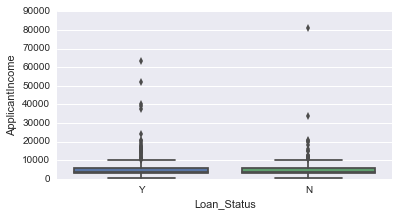

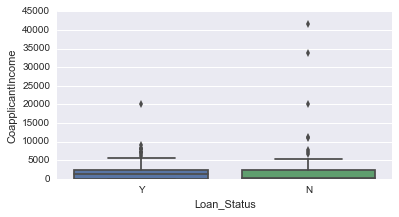

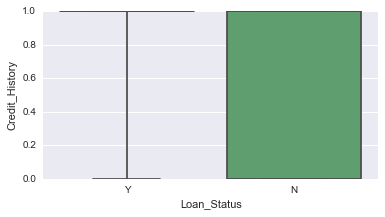

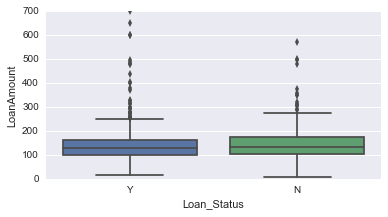

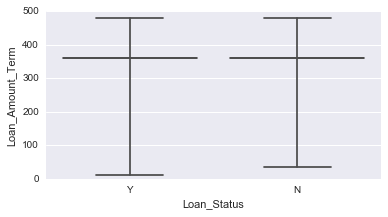

In [23]:
# visualize the train data; relations between each of the numerical features and the target
for feature in numeric_f:
    fig, ax = pl.subplots(figsize = (6, 3))
    feature = sns.boxplot( x = "Loan_Status", y = feature, 
                          data = full_data[full_data["Type"] == "Train"], ax = ax)

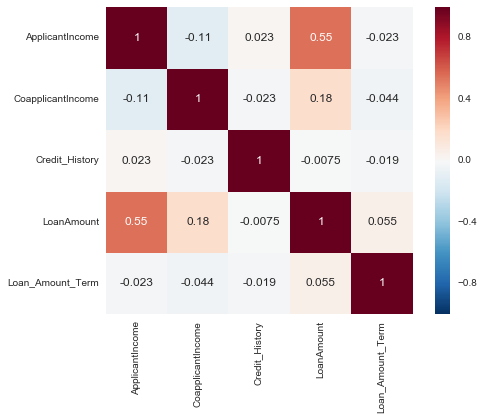

In [24]:
# visulize the correlation matrix of numerical features 
cm = np.corrcoef(full_data[numeric_f].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                yticklabels = numeric_f, xticklabels = numeric_f)

In [25]:
print len(full_data.loc[full_data["Type"] == "Train", "Loan_Status"])
print len(full_data.loc[full_data["Type"] == "Test", "Loan_Status"])

614
367


In [26]:
# cross frequency tables of each categorical feature and the target variable
for f in factor_f:
    cross_tab = pd.crosstab(index = full_data.ix[full_data["Type"] == "Train", "Loan_Status"],
                                              columns = full_data.ix[full_data["Type"] == "Train", f])
    display(cross_tab)

Dependents,0,1,2,3+
Loan_Status,,,,
N,113,36,25,18
Y,247,66,76,33


Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


Gender,Female,Male
Loan_Status,,
N,37,155
Y,75,347


Married,No,Yes
Loan_Status,,
N,79,113
Y,134,288


Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,69,54,69
Y,110,179,133


Self_Employed,No,Yes
Loan_Status,,
N,166,26
Y,366,56


In [27]:
# look at the unique values of each categorical features to preapre for the label encoding
for f in factor_f:
    print f, "has these categories: ", pd.unique(full_data[f])

Dependents has these categories:  ['0' '1' '2' '3+']
Education has these categories:  ['Graduate' 'Not Graduate']
Gender has these categories:  ['Male' 'Female']
Married has these categories:  ['No' 'Yes']
Property_Area has these categories:  ['Urban' 'Rural' 'Semiurban']
Self_Employed has these categories:  ['No' 'Yes']


Note: since all of the categorical features are either oridnal variables or binary, we can use LabelEncoder() function in sklearn pacakge to code the categories

In [28]:
# label encode the categorical features
# we encode in full set in case that any features in training and test sets
# have different categories
number = LabelEncoder()
for f in factor_f:
    full_data[f] = number.fit_transform(full_data[f])
    
# seperate full_set to training and test set again after encoding the categorical features
train = full_data[full_data["Type"] == "Train"]
test = full_data[full_data["Type"] == "Test"]

# encode the target varaiable in the train set
train.loc[:, "Loan_Status"] = number.fit_transform(train["Loan_Status"])

/Users/Yan/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 13 columns):
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
Credit_History       614 non-null float64
Dependents           614 non-null int64
Education            614 non-null int64
Gender               614 non-null int64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Loan_Status          614 non-null int64
Married              614 non-null int64
Property_Area        614 non-null int64
Self_Employed        614 non-null int64
Type                 614 non-null object
dtypes: float64(4), int64(8), object(1)
memory usage: 67.2+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 13 columns):
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null float64
Credit_History       367 non-null float64
Dependents           367 non-null int64
Education            367 non-null int64
Gender               367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Loan_Status          0 non-null object
Married              367 non-null int64
Property_Area        367 non-null int64
Self_Employed        367 non-null int64
Type                 367 non-null object
dtypes: float64(4), int64(7), object(2)
memory usage: 40.1+ KB


In [31]:
train = train.drop(["Type"], axis = 1)
train.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,,
LP001002,5849,0.0,1.0,0,0,1,142.51153,360.0,1,0,2,0
LP001003,4583,1508.0,1.0,1,0,1,128.00000,360.0,0,1,0,0
LP001005,3000,0.0,1.0,0,0,1,66.00000,360.0,1,1,2,1
LP001006,2583,2358.0,1.0,0,1,1,120.00000,360.0,1,1,2,0
LP001008,6000,0.0,1.0,0,0,1,141.00000,360.0,1,0,2,0


In [32]:
test = test.drop(["Type", "Loan_Status"], axis = 1)
test.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,
LP001015,5720,0.0,1.00000,0,0,1,110.0,360.0,1,2,0
LP001022,3076,1500.0,1.00000,1,0,1,126.0,360.0,1,2,0
LP001031,5000,1800.0,1.00000,2,0,1,208.0,360.0,1,2,0
LP001035,2340,2546.0,0.83592,2,0,1,100.0,360.0,1,2,0
LP001051,3276,0.0,1.00000,0,1,1,78.0,360.0,0,2,0


In [110]:
train_X = train.drop(["Loan_Status"], axis = 1)
train_y = train["Loan_Status"]

# RandomForest

In [34]:
# start to train the classification models 
# train a randomforest with default parameters

from sklearn.metrics import accuracy_score, make_scorer
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.3, random_state = 101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print "in sample accuracy: %.6f" %accuracy_score(y_train, y_train_pred)
print "out of sample accuracy: %.6f" %accuracy_score(y_test, y_test_pred)

in sample accuracy: 0.990676
out of sample accuracy: 0.740541


In [35]:
# create a scoring_function for parameter tuning
scoring_function = make_scorer(accuracy_score, greater_is_better = True)

In [36]:
# find the optimal rf model by tuning the parameters
rf = RandomForestClassifier()

parameters = {'n_estimators': np.arange(3, 10, 1), "max_depth": [3,4,5]}
rf_optimal = GridSearchCV(estimator = rf, param_grid = parameters, scoring = scoring_function)
rf_optimal.fit(train_X, train_y)

print "The optimal model have the paramters of: ", rf_optimal.best_params_

The optimal model have the paramters of:  {'n_estimators': 7, 'max_depth': 5}


In [37]:
# build the optimal rf model
rf_optimal = RandomForestClassifier(n_estimators = 7, max_depth = 5)
rf_optimal.fit(X_train, y_train)
y_train_pred_rf = rf_optimal.predict(X_train)
y_test_pred_rf = rf_optimal.predict(X_test)

print "in sample accuracy: %.6f" %accuracy_score(y_train, y_train_pred_rf)
print "out of sample accuracy: %.6f" %accuracy_score(y_test, y_test_pred_rf)

in sample accuracy: 0.848485
out of sample accuracy: 0.778378


# XGBoost

In [38]:
# build a xgboost classificaiton model with default parameters
import xgboost as xgb

In [39]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print "in sampel accuracy: %.6f" %accuracy_score(y_train, y_train_pred)
print "out of sample accuracy: %.6f" %accuracy_score(y_test, y_test_pred)

in sampel accuracy: 0.890443
out of sample accuracy: 0.751351


In [40]:
# find the optimal xgb model by tuning the parameters
xgb_clf = xgb.XGBClassifier()

parameters = {'n_estimators': np.arange(3, 10), "max_depth": np.arange(3,6), "learning_rate": np.arange(0.1, 1, 0.1)}
xgb_optimal = GridSearchCV(estimator = xgb_clf, param_grid = parameters, scoring = scoring_function)
xgb_optimal.fit(train_X, train_y)

print "The optimal model have the paramters of: ", xgb_optimal.best_params_

The optimal model have the paramters of:  {'n_estimators': 4, 'learning_rate': 0.30000000000000004, 'max_depth': 3}


In [41]:
# build the optimal xgb model
xgb_optimal = xgb.XGBClassifier(n_estimators = 4, learning_rate = 0.3, max_depth = 3)
xgb_optimal.fit(X_train, y_train)
y_train_pred_xgb = xgb_optimal.predict(X_train)
y_test_pred_xgb = xgb_optimal.predict(X_test)

print "in sampel accuracy: %.6f" %accuracy_score(y_train, y_train_pred_xgb)
print "out of sample accuracy: %.6f" %accuracy_score(y_test, y_test_pred_xgb)

in sampel accuracy: 0.827506
out of sample accuracy: 0.783784


# SVM

In [42]:
# train a svm model with default parameters
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print "in sampel accuracy: %.6f" %accuracy_score(y_train, y_train_pred)
print "out of sample accuracy: %.6f" %accuracy_score(y_test, y_test_pred)

in sampel accuracy: 1.000000
out of sample accuracy: 0.654054


In [113]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

train_X_std[numeric_f] = stdsc.fit_transform(train_X[numeric_f])

train_X_std.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,
LP001002,0.072991,-0.554487,0.453098,0,0,1,-0.044787,0.279779,0,2,0
LP001003,-0.134412,-0.038732,0.453098,1,0,1,-0.217601,0.279779,1,0,0
LP001005,-0.393747,-0.554487,0.453098,0,0,1,-0.955941,0.279779,1,2,1
LP001006,-0.462062,0.251980,0.453098,0,1,1,-0.312870,0.279779,1,2,0
LP001008,0.097728,-0.554487,0.453098,0,0,1,-0.062787,0.279779,0,2,0


In [119]:
# find the optimal svm model by tuning the paramters
svm = SVC()

parameters = {'kernel': ['linear', 'rbf', 'poly'], 'C': [1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1, 100] }

svm_optimal = GridSearchCV(estimator = svm, param_grid = parameters, scoring = scoring_function)
svm_optimal.fit(train_X_std, train_y)

print "The optimal model have the paramters of: ", svm_optimal.best_params_

The optimal model have the paramters of:  {'kernel': 'linear', 'C': 1, 'gamma': 0.001}


In [122]:
# build the optimal svm model

X_train_std, X_test_std, y_train, y_test = train_test_split(train_X_std, train_y, test_size = 0.3, random_state = 101)

svm_optimal = SVC(kernel = 'linear', C = 1, gamma = 0.001)
svm_optimal.fit(X_train_std, y_train)
y_train_pred_svm = svm_optimal.predict(X_train_std)
y_test_pred_svm = svm_optimal.predict(X_test_std)

print "in sampel accuracy: %.6f" %accuracy_score(y_train, y_train_pred_svm)
print "out of sample accuracy: %.6f" %accuracy_score(y_test, y_test_pred_svm)

in sampel accuracy: 0.820513
out of sample accuracy: 0.783784


# Logistic Regression

In [53]:
# build a logistic regression model with default parameter
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print "in sampel accuracy: %.6f" %accuracy_score(y_train, y_train_pred)
print "out of sample accuracy: %.6f" %accuracy_score(y_test, y_test_pred)

in sampel accuracy: 0.825175
out of sample accuracy: 0.778378


In [52]:
# find the optimal xgb model by tuning the parameters
lf = LogisticRegression()

parameters = {'C': [0.001, 0.01, 0.1, 1, 100]}
lr_optimal = GridSearchCV(estimator = lr, param_grid = parameters, scoring = scoring_function)
lr_optimal.fit(train_X, train_y)

print "The optimal model have the paramters of: ", lr_optimal.best_params_

The optimal model have the paramters of:  {'C': 1}


In [123]:
lr = LogisticRegression(C = 1)
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

print "in sampel accuracy: %.6f" %accuracy_score(y_train, y_train_pred_lr)
print "out of sample accuracy: %.6f" %accuracy_score(y_test, y_test_pred_lr)

in sampel accuracy: 0.825175
out of sample accuracy: 0.778378


# Stacked Model

In [131]:
d_train = {'rf':y_train_pred_rf, 'xgb': y_train_pred_xgb, 'svm': y_train_pred_svm, 'lr': y_train_pred_lr}
d_test = {'rf':y_test_pred_rf, 'xgb': y_test_pred_xgb, 'svm': y_test_pred_svm, 'lr': y_test_pred_lr}

In [132]:
pd_train= pd.DataFrame(data = d_train, index = y_train.index)
pd_test= pd.DataFrame(data = d_test, index = y_test.index)

In [153]:
print pd_train.head(10)
print pd_train.shape

          lr  rf  svm  xgb
Loan_ID                   
LP002341   1   1    1    1
LP002113   0   1    0    0
LP001931   1   1    1    1
LP002024   1   1    1    1
LP001634   1   0    1    1
LP002619   1   1    1    1
LP002776   0   0    0    0
LP002606   1   1    1    1
LP002053   1   1    1    1
LP002449   0   1    0    0
(429, 4)


In [154]:
print y_train.head(10)

Loan_ID
LP002341    0
LP002113    0
LP001931    1
LP002024    0
LP001634    0
LP002619    1
LP002776    0
LP002606    1
LP002053    1
LP002449    1
Name: Loan_Status, dtype: int64


In [142]:
pd_test.head()
pd_test.shape

(185, 4)

In [160]:
nb = GaussianNB()
nb.fit(pd_train, y_train)

y_train_pred_stacked = nb.predict(pd_train)
y_test_pred_stacked = nb.predict(pd_test)

print "in sampel accuracy: %.6f" %accuracy_score(y_train, y_train_pred_stacked)
print "out of sample accuracy: %.6f" %accuracy_score(y_test, y_test_pred_stacked)

in sampel accuracy: 0.843823
out of sample accuracy: 0.772973


# Save results for submission

In [170]:
xgb_optimal = xgb.XGBClassifier(n_estimators = 4, learning_rate = 0.3, max_depth = 3)
xgb_optimal.fit(train_X, train_y)
results = xgb_optimal.predict(test)

In [173]:
results_inverse = number.inverse_transform(results)

In [174]:
submission = pd.DataFrame(results_inverse, columns = ["Loan_Status"], index = test.index)

In [175]:
submission.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


In [176]:
submission.to_csv("results_Yan.csv")